## Clone the Repository

In [4]:
!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git

Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 83 (delta 25), reused 77 (delta 22), pack-reused 0
Unpacking objects: 100% (83/83), 3.57 MiB | 6.40 MiB/s, done.


In [5]:
# Enter the repo directory.
%cd FasterRCNN42028/

/content/FasterRCNN42028


In [6]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 KB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6

## Download the Dataset


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!cp -r /content/drive/Shareddrives/42028_Lab_Resources/Week8/data /content/FasterRCNN42028/

## Create the Custom Dataset YAML File.

In [18]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'data/images/train'
TRAIN_DIR_LABELS: 'data/images/train'
VALID_DIR_IMAGES: 'data/images/valid'
VALID_DIR_LABELS: 'data/images/valid'

# Class names.
CLASSES: [
    '__background__',
    'boat',
    'car',
    'jetski',
    'lift',
    'dock'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


## Training

In [9]:
!wandb disabled

W&B disabled.


In [15]:
!python train.py --config data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --project-name custom_training --batch-size 2 --no-mosaic

Not using distributed mode
device cuda
2023-02-11 05:53:35.845236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 05:53:38.759365: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-02-11 05:53:38.759777: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/pyt

## Visualize Validation Results

In [19]:
import matplotlib.pyplot as plt
import glob as glob

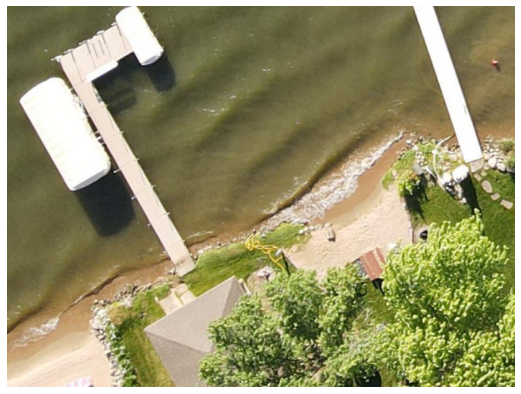

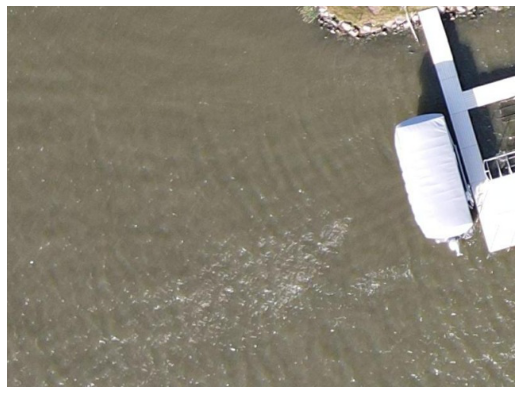

In [23]:
results_dir_path = '/content/FasterRCNN42028/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Evaluation

In [21]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:01<00:00,  1.22s/it]


{'map': tensor(0.2358),
 'map_50': tensor(0.4155),
 'map_75': tensor(0.1950),
 'map_large': tensor(0.3268),
 'map_medium': tensor(0.2272),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.2208),
 'mar_10': tensor(0.4333),
 'mar_100': tensor(0.4333),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.4583),
 'mar_medium': tensor(0.4500),
 'mar_small': tensor(-1.)}


In [24]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 1/1 [00:01<00:00,  1.47s/it]


{'map': tensor(0.2358),
 'map_50': tensor(0.4155),
 'map_75': tensor(0.1950),
 'map_large': tensor(0.3268),
 'map_medium': tensor(0.2272),
 'map_per_class': tensor([-1.0000, -1.0000, -1.0000,  0.3794,  0.0921]),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.2208),
 'mar_10': tensor(0.4333),
 'mar_100': tensor(0.4333),
 'mar_100_per_class': tensor([-1.0000, -1.0000, -1.0000,  0.5000,  0.3667]),
 'mar_large': tensor(0.4583),
 'mar_medium': tensor(0.4500),
 'mar_small': tensor(-1.)}


"Cl

In [25]:
!python inference.py --input data/images/train/12.jpg --weights outputs/training/custom_training/best_model.pth

Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 2.557


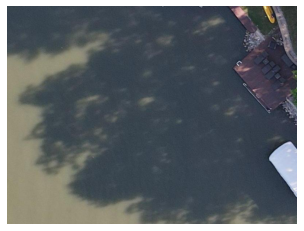

In [26]:
image = plt.imread('outputs/inference/res_1/12.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()